In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
# device = torch.device('cpu')
# device

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import ta as ta


In [5]:
# import yfinance as yf

# # Define the ticker symbol
# ticker_symbol = "^GSPC"

# # Get data on this ticker
# sp500_data = yf.Ticker(ticker_symbol)

# # Get historical market data
# historical_data = sp500_data.history(interval="1m", start="2024-05-20", end="2024-05-27")



In [6]:
import requests
import pandas as pd

api_key = 'XPQXF0VKO06IFUEJ'
symbol = 'SPY'
interval = '1min'
outputsize = 'full'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&outputsize={outputsize}&apikey={api_key}'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['Time Series (1min)']).T
df.columns = ['open', 'high', 'low', 'close', 'volume']
df.index = pd.to_datetime(df.index)
historical_data = df.astype(float)



In [7]:
data = historical_data

In [8]:
import pandas as pd
import ta

# Load your stock data


# Calculate technical indicators
data['MA50'] = ta.trend.sma_indicator(data['close'], window=15)
data['RSI'] = ta.momentum.rsi(data['close'], window=15)
data['MACD'] = ta.trend.macd(data['close'])
data['BB_upper'] = ta.volatility.bollinger_hband(data['close'])
data['BB_lower'] = ta.volatility.bollinger_lband(data['close'])
data['ADX'] = ta.trend.adx(data['high'], data['low'], data['close'])
data['CCI'] = ta.trend.cci(data['high'], data['low'], data['close'])
data['ATR'] = ta.volatility.average_true_range(data['high'], data['low'], data['close'])
data['ROC'] = ta.momentum.roc(data['close'])
data['OBV'] = ta.volume.on_balance_volume(data['close'], data['volume'])

# Drop rows with NaN values (resulting from the indicator calculation)
data = data.dropna()

# Add more indicators as needed

# Drop rows with NaN values (resulting from the indicator calculation)
historical_data = data


In [9]:

# historical_data = historical_data[1:]
historical_data

,open,high,low,close,volume,MA50,RSI,MACD,BB_upper,BB_lower,ADX,CCI,ATR,ROC,OBV
2024-06-13 19:35:00,542.465,542.480,542.46,542.460,168.0,542.464667,49.740450,-0.007293,542.542401,542.390599,0.000000,12.108750,0.055084,-0.007373,1948904.0
2024-06-13 19:34:00,542.480,542.500,542.46,542.500,79.0,542.460667,55.784021,-0.003060,542.545708,542.391292,0.000000,59.589115,0.054006,0.009217,1948983.0
2024-06-13 19:33:00,542.450,542.490,542.44,542.440,1253.0,542.453667,46.749476,-0.004495,542.544481,542.388519,10.825426,-17.346611,0.054434,-0.011060,1947730.0
2024-06-13 19:32:00,542.440,542.445,542.44,542.445,12.0,542.450000,47.508521,-0.005170,542.543766,542.386734,10.277082,-49.656630,0.050903,-0.004609,1947742.0
2024-06-13 19:31:00,542.440,542.440,542.42,542.425,5501.0,542.448333,44.773340,-0.007235,542.544225,542.383775,10.313755,-80.993081,0.049053,-0.000922,1942241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-15 04:04:00,523.540,523.540,523.49,523.490,52.0,523.507333,45.528049,-0.010172,523.580098,523.388902,12.582964,34.642662,0.037597,-0.005730,-33819397.0
2024-05-15 04:03:00,523.530,523.580,523.53,523.560,279.0,523.514000,54.517254,-0.005188,523.585209,523.399791,12.601534,112.094395,0.041340,0.007641,-33819118.0
2024-05-15 04:02:00,523.480,523.540,523.48,523.540,67.0,523.514000,51.895607,-0.002819,523.587106,523.409894,11.853598,42.692939,0.044101,0.003820,-33819185.0
2024-05-15 04:01:00,523.520,523.520,523.48,523.480,17.0,523.511333,44.948004,-0.005717,523.579409,523.425591,11.159087,-23.209284,0.045237,0.003821,-33819202.0


In [10]:
historical_data = historical_data.drop(['open', 'high','low'], axis=1)

<Axes: >

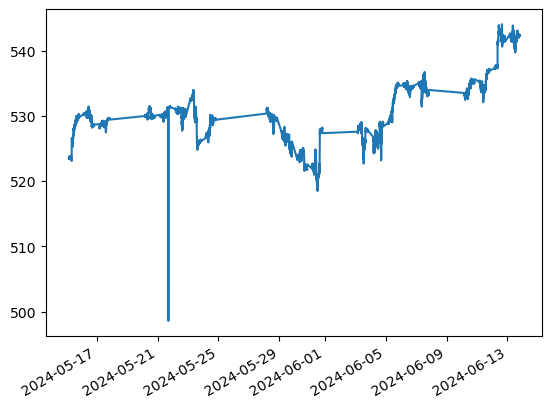

In [11]:
historical_data['close'].plot()

In [12]:
historical_data

,close,volume,MA50,RSI,MACD,BB_upper,BB_lower,ADX,CCI,ATR,ROC,OBV
2024-06-13 19:35:00,542.460,168.0,542.464667,49.740450,-0.007293,542.542401,542.390599,0.000000,12.108750,0.055084,-0.007373,1948904.0
2024-06-13 19:34:00,542.500,79.0,542.460667,55.784021,-0.003060,542.545708,542.391292,0.000000,59.589115,0.054006,0.009217,1948983.0
2024-06-13 19:33:00,542.440,1253.0,542.453667,46.749476,-0.004495,542.544481,542.388519,10.825426,-17.346611,0.054434,-0.011060,1947730.0
2024-06-13 19:32:00,542.445,12.0,542.450000,47.508521,-0.005170,542.543766,542.386734,10.277082,-49.656630,0.050903,-0.004609,1947742.0
2024-06-13 19:31:00,542.425,5501.0,542.448333,44.773340,-0.007235,542.544225,542.383775,10.313755,-80.993081,0.049053,-0.000922,1942241.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-15 04:04:00,523.490,52.0,523.507333,45.528049,-0.010172,523.580098,523.388902,12.582964,34.642662,0.037597,-0.005730,-33819397.0
2024-05-15 04:03:00,523.560,279.0,523.514000,54.517254,-0.005188,523.585209,523.399791,12.601534,112.094395,0.041340,0.007641,-33819118.0
2024-05-15 04:02:00,523.540,67.0,523.514000,51.895607,-0.002819,523.587106,523.409894,11.853598,42.692939,0.044101,0.003820,-33819185.0
2024-05-15 04:01:00,523.480,17.0,523.511333,44.948004,-0.005717,523.579409,523.425591,11.159087,-23.209284,0.045237,0.003821,-33819202.0


In [13]:
historical_data_reversed_rows = historical_data.iloc[::-1].reset_index(drop=True)
print(historical_data_reversed_rows)


         close  volume        MA50        RSI      MACD    BB_upper  \
0      523.500  5810.0  523.510000  47.460096 -0.006327  523.568451   
1      523.480    17.0  523.511333  44.948004 -0.005717  523.579409   
2      523.540    67.0  523.514000  51.895607 -0.002819  523.587106   
3      523.560   279.0  523.514000  54.517254 -0.005188  523.585209   
4      523.490    52.0  523.507333  45.528049 -0.010172  523.580098   
...        ...     ...         ...        ...       ...         ...   
19704  542.425  5501.0  542.448333  44.773340 -0.007235  542.544225   
19705  542.445    12.0  542.450000  47.508521 -0.005170  542.543766   
19706  542.440  1253.0  542.453667  46.749476 -0.004495  542.544481   
19707  542.500    79.0  542.460667  55.784021 -0.003060  542.545708   
19708  542.460   168.0  542.464667  49.740450 -0.007293  542.542401   

         BB_lower        ADX         CCI       ATR       ROC         OBV  
0      523.446549  14.365148  270.202020  0.080577  0.009552 -33813392.0

In [14]:
historical_data = historical_data_reversed_rows

In [15]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random


In [25]:
import gym
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        
        self.df = df
        self.current_step = 0
        self.prev_step =0
        self.balance = 1000000
        self.shares_held = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.max_steps = len(df) - 1
        
        self.action_space = gym.spaces.Discrete(3)  # 0: Hold, 1: Buy, 2: Sell
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(12,), dtype=np.float32)

        self.No_of_transactions =0
        
    
    def reset(self):
        self.current_step = 0
        self.prev_step =0
        self.balance = 1000000
        
        self.shares_held = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.No_of_transactions =0

        return self._get_observation()
    
    def _get_observation(self):
        return np.array([
            # self.balance,
            # self.shares_held,
            # # self.total_shares_sold,
            # self.total_sales_value,
            self.df.iloc[self.current_step]['close'],
            self.df.iloc[self.current_step]['volume'],
            self.df.iloc[self.current_step]['MA50'],
            self.df.iloc[self.current_step]['RSI'],
            self.df.iloc[self.current_step]['MACD'],
            
            self.df.iloc[self.current_step]['BB_upper'],
            self.df.iloc[self.current_step]['BB_lower'],
            self.df.iloc[self.current_step]['ADX'],
            self.df.iloc[self.current_step]['CCI'],
            self.df.iloc[self.current_step]['ATR'],
            self.df.iloc[self.current_step]['ROC'],
            self.df.iloc[self.current_step]['OBV']
        
        ])
    def _get_primary_observations(self):
        return np.array([
            self.balance,
            self.shares_held,
            self.No_of_transactions,
          
          
            
        
        ])
    
    # def step(self, action):
    #     current_price = self.df.iloc[self.current_step]['close']
      
    #     prev_val = self.balance + self.shares_held*self.df.iloc[self.prev_step]['close']
        
    #     reward =0
    #     if action == 1:  # Buy
    #         self.shares_held += self.balance // current_price
    #         self.balance %= current_price
    #         self.prev_step = self.current_step
    #         reward =0
        
    #     elif action == 2:  # Sell
    #         if(self.shares_held!=0):
    #             self.No_of_transactions +=1
    #         self.balance += self.shares_held * current_price
    #         self.total_shares_sold += self.shares_held
    #         self.total_sales_value += self.shares_held * current_price
    #         self.shares_held = 0
    #         reward = self.balance  -prev_val
        
    #     self.current_step += 1
    #     done = self.current_step >= self.max_steps
    #     # reward = self.balance + self.shares_held * current_price + self.total_sales_value
       
        
    #     return self._get_observation(), reward, done, {}
    
    def render(self, mode='human'):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total sales value: {self.total_sales_value}')

# Example usage
data = historical_data
env = StockTradingEnv(data)


In [26]:
def get_state(df,step):
    return np.array([
            # self.balance,
            # self.shares_held,
            # # self.total_shares_sold,
            # self.total_sales_value,
           df.iloc[step]['close'],
           df.iloc[step]['volume'],
           df.iloc[step]['MA50'],
           df.iloc[step]['RSI'],
           df.iloc[step]['MACD'],
           df.iloc[step]['BB_upper'],
           df.iloc[step]['BB_lower'],
           df.iloc[step]['ADX'],
           df.iloc[step]['CCI'],
           df.iloc[step]['ATR'],
           df.iloc[step]['ROC'],
           df.iloc[step]['OBV']
        
        ]) 

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32,64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,8)
        self.fc7 = nn.Linear(8,4)
        self.fc8 = nn.Linear(4, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = self.fc8(x)
        return x


In [28]:

# Example usage
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n
policy_net = DQN(input_dim, output_dim)
target_net = DQN(input_dim, output_dim)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
input_dim

12

In [29]:
import random
from collections import deque

class DQNAgent:
    def __init__(self, env, policy_net, target_net, batch_size=4096, gamma=0.99, epsilon_start=1.0, epsilon_end=0.01, epsilon_decay=0.995):
        self.env = env
        self.policy_net = policy_net
        self.target_net = target_net
        self.batch_size = batch_size
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=10000)
        self.optimizer = optim.Adam(policy_net.parameters())
        self.loss_fn = nn.MSELoss()
    
    def select_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        with torch.no_grad():
            state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
            q_values = self.policy_net(state)
            return q_values.argmax().item()
    
    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def sample_memory(self):
        return random.sample(self.memory, self.batch_size)
    
    def update_policy(self):
        if len(self.memory) < self.batch_size:
            return
        
        transitions = self.sample_memory()
        batch = list(zip(*transitions))
        states =np.array(batch[0])

        states = torch.tensor(states, dtype=torch.float32).to(device)
        actions = torch.tensor(batch[1], dtype=torch.long).unsqueeze(1).to(device)
        rewards = torch.tensor(batch[2], dtype=torch.float32).unsqueeze(1).to(device)
        next_states = np.array(batch[3])
        next_states = torch.tensor(next_states, dtype=torch.float32).to(device)
        dones = torch.tensor(batch[4], dtype=torch.float32).unsqueeze(1).to(device)

        
        current_q_values = self.policy_net(states).gather(1, actions)
        max_next_q_values = self.target_net(next_states).max(1)[0].unsqueeze(1)
        expected_q_values = rewards + self.gamma * max_next_q_values * (1 - dones)
        
        loss = self.loss_fn(current_q_values, expected_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)

# Example usage



In [30]:
policy_net.to(device)
target_net.to(device)
agent = DQNAgent(env, policy_net, target_net)

In [31]:
num_episodes = 100
from tqdm import tqdm
for episode in range(num_episodes):
    # state = env.reset()
    total_reward = 0
    number_trans = 0
    wins =0
    lose = 0
    
    
    
    
    for step in tqdm(range(0,len(historical_data))):
        
        balance = 1000000
        shares_held = 0
        shares_sold =0
        state = get_state(historical_data,step)
        action = agent.select_action(state)
        done = False
        # print(action)
        current_price = historical_data.iloc[step]['close']
        if action ==1: ## BUY
            shares_held = balance//current_price
            balance %= current_price
            for tem_step in range(step,step+1800):
                if tem_step == len(historical_data)-1:
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    break
                if historical_data.iloc[tem_step]['close']>=1.007*current_price:
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    wins +=1
                    break
                ### Stop loss 
                if historical_data.iloc[tem_step]['close']<=0.995*current_price: 
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    lose += 1
                    break
            if step == len(historical_data)-1:
                done = True
            number_trans +=1
            reward =  balance -1000000
            total_reward += reward
            agent.store_transition(state, action, reward, next_state, done)
            agent.update_policy()
        
        if action==2: ## Sell  short
            No_shares_sold = 0.8*balance//current_price
            shares_sell = No_shares_sold*current_price
            for tem_step in range(step,step+1800):
                if tem_step == len(historical_data)-1:
                    shares_buy = No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    break
                if historical_data.iloc[tem_step]['close']>=1.005*current_price:
                    shares_buy =  No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    lose +=1
                    break
                ### Stop loss 
                if historical_data.iloc[tem_step]['close']<=0.993*current_price: 
                    shares_buy =  No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    wins +=1
                    break
            if step == len(historical_data)-1:
                done = True
            number_trans +=1
            reward =  shares_sell -shares_buy
            total_reward += reward
            agent.store_transition(state, action, reward, next_state, done)
            agent.update_policy()
       






            
        # next_state, reward, done, _ = env.step(action)
        # balance,shares_held,no_oftrans = env._get_primary_observations()
        
        # agent.store_transition(state, action, reward, next_state, done)
        # agent.update_policy()
        # state = next_state
        # total_reward += reward
        # print(f'Episode {episode + 1}, Total Reward: {total_reward}')
        
        
    print(f'Episode {episode + 1}, Total Reward: {total_reward}')
    print(f'Number of transcations: {number_trans}, Wins: {wins}, Lose: {lose} ')
            
    
    # Update the target network
    if episode % 10 == 0:
        target_net.load_state_dict(policy_net.state_dict())
    torch.save(policy_net.state_dict(), f'dqn_model_Sell_short {episode+1}.pth')


# Save the trained model


100%|██████████| 19709/19709 [20:45<00:00, 15.83it/s]


Episode 1, Total Reward: -632409350.3220133
Number of transcations: 17585, Wins: 5618, Lose: 7744 


100%|██████████| 19709/19709 [23:34<00:00, 13.93it/s] 


Episode 2, Total Reward: 70934842.4660012
Number of transcations: 19650, Wins: 6941, Lose: 8170 


100%|██████████| 19709/19709 [26:10<00:00, 12.55it/s] 


Episode 3, Total Reward: 64127720.05100103
Number of transcations: 19640, Wins: 6946, Lose: 8161 


100%|██████████| 19709/19709 [25:15<00:00, 13.01it/s] 


Episode 4, Total Reward: 64946852.95600099
Number of transcations: 19631, Wins: 6930, Lose: 8166 


100%|██████████| 19709/19709 [23:51<00:00, 13.77it/s] 


Episode 5, Total Reward: 63521506.4530013
Number of transcations: 19641, Wins: 6938, Lose: 8172 


100%|██████████| 19709/19709 [23:49<00:00, 13.79it/s] 


Episode 6, Total Reward: 60254072.711001106
Number of transcations: 19654, Wins: 6935, Lose: 8173 


100%|██████████| 19709/19709 [23:42<00:00, 13.86it/s] 


Episode 7, Total Reward: 66693442.066000946
Number of transcations: 19648, Wins: 6951, Lose: 8153 


100%|██████████| 19709/19709 [23:40<00:00, 13.88it/s] 


Episode 8, Total Reward: 67468621.5310011
Number of transcations: 19644, Wins: 6950, Lose: 8162 


100%|██████████| 19709/19709 [23:34<00:00, 13.93it/s] 


Episode 9, Total Reward: 66270846.00400109
Number of transcations: 19650, Wins: 6948, Lose: 8165 


100%|██████████| 19709/19709 [23:34<00:00, 13.93it/s] 


Episode 10, Total Reward: 68115817.68900114
Number of transcations: 19636, Wins: 6937, Lose: 8171 


100%|██████████| 19709/19709 [23:36<00:00, 13.91it/s]


Episode 11, Total Reward: 62183366.7520013
Number of transcations: 19646, Wins: 6940, Lose: 8160 


100%|██████████| 19709/19709 [23:34<00:00, 13.93it/s] 


Episode 12, Total Reward: 62004355.62700103
Number of transcations: 19653, Wins: 6936, Lose: 8177 


100%|██████████| 19709/19709 [23:35<00:00, 13.93it/s] 


Episode 13, Total Reward: 61908244.499001265
Number of transcations: 19641, Wins: 6930, Lose: 8176 


100%|██████████| 19709/19709 [23:32<00:00, 13.96it/s]


Episode 14, Total Reward: 64967856.545001365
Number of transcations: 19642, Wins: 6932, Lose: 8167 


100%|██████████| 19709/19709 [23:42<00:00, 13.85it/s] 


Episode 15, Total Reward: 65622381.315001175
Number of transcations: 19636, Wins: 6949, Lose: 8162 


100%|██████████| 19709/19709 [23:36<00:00, 13.91it/s]


Episode 16, Total Reward: 65749529.370001145
Number of transcations: 19653, Wins: 6936, Lose: 8183 


100%|██████████| 19709/19709 [23:57<00:00, 13.71it/s] 


Episode 17, Total Reward: 63922143.63100128
Number of transcations: 19654, Wins: 6942, Lose: 8181 


100%|██████████| 19709/19709 [23:40<00:00, 13.88it/s]


Episode 18, Total Reward: 64309222.70600102
Number of transcations: 19626, Wins: 6933, Lose: 8157 


100%|██████████| 19709/19709 [23:41<00:00, 13.86it/s] 


Episode 19, Total Reward: 64609450.81500096
Number of transcations: 19650, Wins: 6938, Lose: 8171 


100%|██████████| 19709/19709 [23:55<00:00, 13.73it/s]


Episode 20, Total Reward: 62763448.19500124
Number of transcations: 19643, Wins: 6935, Lose: 8165 


100%|██████████| 19709/19709 [23:52<00:00, 13.75it/s]


Episode 21, Total Reward: 65745476.95200098
Number of transcations: 19648, Wins: 6945, Lose: 8169 


100%|██████████| 19709/19709 [23:46<00:00, 13.82it/s] 


Episode 22, Total Reward: 65277176.289001144
Number of transcations: 19649, Wins: 6941, Lose: 8166 


100%|██████████| 19709/19709 [24:14<00:00, 13.55it/s]


Episode 23, Total Reward: 70223422.31400108
Number of transcations: 19628, Wins: 6950, Lose: 8149 


100%|██████████| 19709/19709 [24:09<00:00, 13.60it/s] 


Episode 24, Total Reward: 70641653.9490012
Number of transcations: 19636, Wins: 6953, Lose: 8156 


100%|██████████| 19709/19709 [23:45<00:00, 13.83it/s] 


Episode 25, Total Reward: 65250321.28500106
Number of transcations: 19637, Wins: 6950, Lose: 8155 


100%|██████████| 19709/19709 [23:27<00:00, 14.00it/s]


Episode 26, Total Reward: 62452299.274001315
Number of transcations: 19642, Wins: 6940, Lose: 8164 


100%|██████████| 19709/19709 [23:32<00:00, 13.95it/s]


Episode 27, Total Reward: 64428807.47100103
Number of transcations: 19645, Wins: 6941, Lose: 8159 


100%|██████████| 19709/19709 [1:29:30<00:00,  3.67it/s]     


Episode 28, Total Reward: 62159924.33300103
Number of transcations: 19653, Wins: 6942, Lose: 8172 


 86%|████████▌ | 16876/19709 [18:24<03:32, 13.36it/s]

: 